## Solving SUDOKU with convolutions


The following will walk you through solving [sudoku game](https://en.wikipedia.org/wiki/Sudoku) automatically with a computer vision technique. The computer vision technique used here is a [convolution](https://en.wikipedia.org/wiki/Convolution). The idea is simple, for identifying numbers on greed, kernels of different numbers are convolved. After numbers on greed have been identified, we use `soduku.py` to solve the sudoku game. The notebook uses two sets of temples and two additional python scripts:

 - `axillary.py` 
 - `sudoku.py` - credits go to [Nesh Patel](https://medium.com/@neshpatel/solving-sudoku-part-i-7c4bb3097aa7)
 
### **Table of content**

1. [Import sudoku an image](#image)
2. [Import tamplet sets](#sets)
3. [Normalize the image](#normalize)
4. [Solve sudoku and visualize the results](#results)
    1. [Run the two sets of templets over the image and plot the result](#2sets)




***Side note:***

The proposed algorithm is not optimal. For some images of sudoku, the algorithm might not be able to identify numbers on the agreed. That depends on the rotation and the tilt of the sudoku greed on an image.

In [9]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from sudoku import solve_sudoku
from matplotlib import cm

%matplotlib inline

#### Import sudoku image<a name="image"></a>

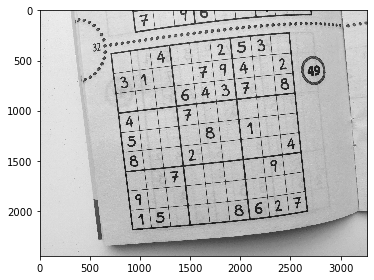

In [2]:
fname = './test/IMG_1271.jpg'
sudocu = io.imread(fname, as_gray=True)
io.imshow(sudocu);

#### Import tamplet sets<a name="sets"></a>

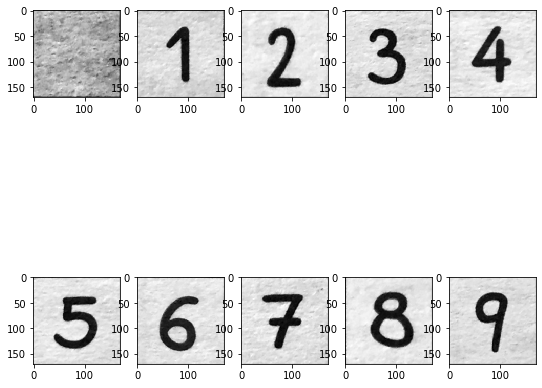

In [3]:
taplet = []
for i in range(10):
    fname = './tamplate'+str(i)+'.png'
    image = io.imread(fname, as_gray=True)
    img = resize(image, (170,170), anti_aliasing=True)
    taplet.append( img )
    
fig, ax =  plt.subplots(2,5, figsize=(9,9))
ax = ax.flatten()
for i,j in enumerate(taplet):
    ax[i].imshow(j,cmap = 'gray')
    


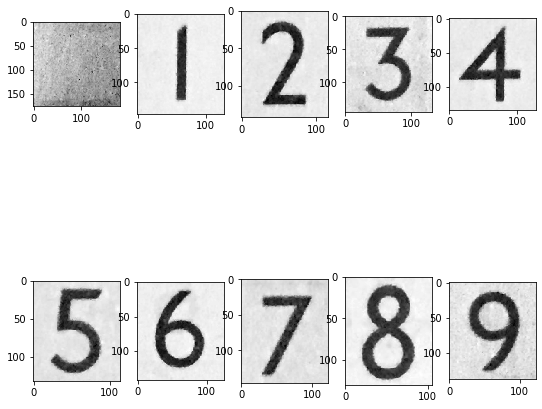

In [4]:
taplet1 = []
for i in range(10):
    fname = './tamplets/tamplate'+str(i)+'.png'
    image = io.imread(fname, as_gray=True)
    taplet1.append( image )
    
fig, ax =  plt.subplots(2,5, figsize=(9,9))
ax = ax.flatten()
for i,j in enumerate(taplet1):
    ax[i].imshow(j,cmap = 'gray')

#### Normalize the image<a name="normalize"></a>

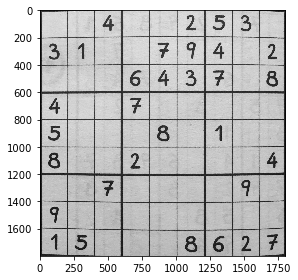

In [5]:
from axillary import img_norm

norm_sud = img_norm(sudocu)
io.imshow(norm_sud);

#### Solve sudoku and visualize the results<a name='results'></a>

In [6]:
from axillary import digit_search

sudocu_matrix = digit_search(norm_sud,taplet)
sudocu_matrix



array([[0, 0, 4, 0, 0, 2, 5, 3, 0],
       [3, 1, 0, 0, 7, 9, 4, 0, 2],
       [0, 0, 0, 6, 4, 3, 7, 0, 8],
       [4, 0, 0, 7, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 8, 0, 1, 0, 0],
       [8, 0, 0, 2, 0, 0, 0, 0, 4],
       [0, 0, 7, 0, 0, 0, 0, 9, 0],
       [9, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 5, 0, 0, 0, 8, 6, 2, 7]])

In [7]:
solved_sudoku = solve_sudoku(sudocu_matrix)
solved_sudoku

array([[7, 6, 4, 8, 1, 2, 5, 3, 9],
       [3, 1, 8, 5, 7, 9, 4, 6, 2],
       [2, 9, 5, 6, 4, 3, 7, 1, 8],
       [4, 3, 9, 7, 5, 1, 2, 8, 6],
       [5, 2, 6, 9, 8, 4, 1, 7, 3],
       [8, 7, 1, 2, 3, 6, 9, 5, 4],
       [6, 4, 7, 3, 2, 5, 8, 9, 1],
       [9, 8, 2, 1, 6, 7, 3, 4, 5],
       [1, 5, 3, 4, 9, 8, 6, 2, 7]])

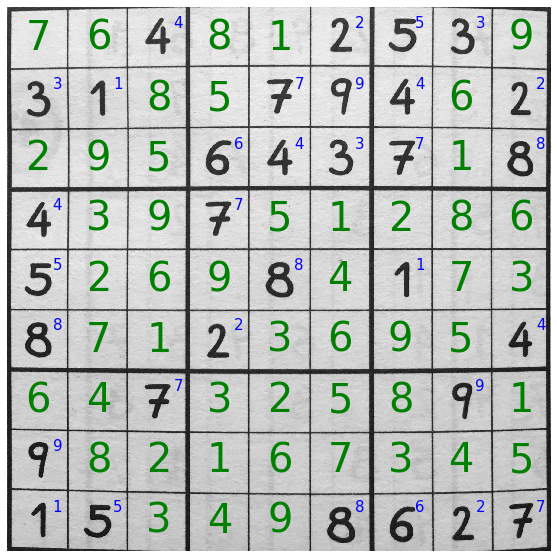

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(norm_sud.copy(), cmap=cm.gray)

for numI,i in enumerate(range(0,1800,200)):
        for numJ, j in enumerate(range(0,1800,200)):
            
            if sudocu_matrix[numI,numJ]:
                    x = i+70
                    y = j+150
                    plt.text(y, x, str(sudocu_matrix[numI,numJ]), c='b', fontsize=15)

            if not sudocu_matrix[numI, numJ]:
                x = i+140
                y = j+60
                plt.text(y, x, str(solved_sudoku[numI,numJ]), c='g', fontsize=40)

plt.gca().set_axis_off()
plt.show()

#### Run the two sets of templets over the image and plot the result<a name='2sets'></a>


In [11]:
norm_sud = img_norm(sudocu)
for i,tamplet in enumerate([taplet, taplet1]):

    try:
        sudocu_matrix = digit_search(norm_sud,tamplet)
        solved_sudoku = solve_sudoku(sudocu_matrix)
    except:
        print("Tamplet {} did not work".format(i))  

Tamplet 1 did not work


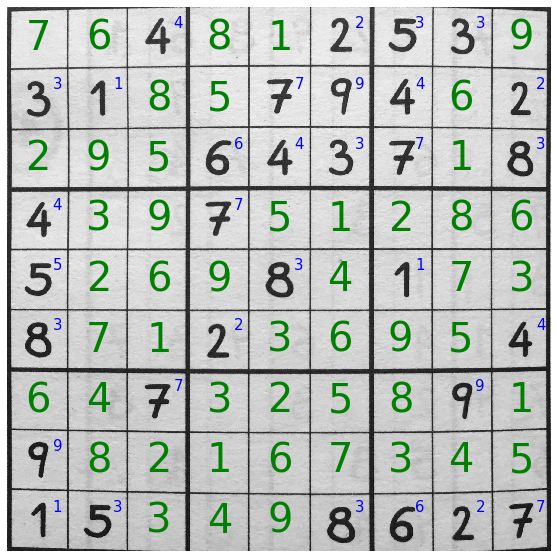

In [98]:
plt.figure(figsize=(10,10))
plt.imshow(norm_sud.copy(), cmap=cm.gray)

for numI,i in enumerate(range(0,1800,200)):
        for numJ, j in enumerate(range(0,1800,200)):
            if sudocu_matrix[numI,numJ]:
                    x = i+70
                    y = j+150
                    plt.text(y, x, str(sudocu_matrix[numI,numJ]), c='b', fontsize=15)
            if not sudocu_matrix[numI, numJ]:
                x = i+140
                y = j+60
                plt.text(y, x, str(solved_sudoku[numI,numJ]), c='g', fontsize=40)
plt.gca().set_axis_off()
plt.show()